In [ ]:
import requests
import json
import datetime
def getCreds():
    creds=dict()
    creds['access_token']='EAAoDNO8ZA4YQBAB1B0sVgYhkIkskJ8TiB5pwLQ3oTpY0ExoQOc1ZBV0QHVwzqblG6u8z8ZA1jitOicL7XCUz4fAZBJGj111RFDPu0UDZCQ8fdPGj0K2DIwMyf1ppSDFI0nznbuCezjWIV8rppZAFqHZAvJTuZAncRP8kJpsAxYx0mFJZBf3s5mrlwWDqSryeZAP6jDSw9p9omWpwZDZD'
    creds['client_id']='2818275651740036' #app id
    creds['client_secret']='ad2cf23d766d0ac35e58201b0d197e34' #secret-key
    creds['graph_domain']='https://graph.facebook.com/'
    creds['graph_version']='v6.0'
    creds['endpoint_base']=creds['graph_domain']+creds['graph_version']+'/'
    creds['debug']='no'
    creds['page_id']='100574341800772' # page id
    creds['instagram_account_id']='17841404381104441'
    creds['username']='giannis_an34'
    return creds

def makeApiCall(url,endpointParams,debug='no'):
    data=requests.get(url,endpointParams)
    
    response=dict()
    response['url']=url
    response['endpoint_params']= endpointParams
    response['endpoint_params_pretty']=json.dumps(endpointParams,indent=4)
    response['json_data']=json.loads(data.content)
    response['json_data_pretty']=json.dumps(response['json_data'],indent=4)
    
    if(debug=='yes'):
        displayApiCallData(response)
    return response

def displayApiCallData(response):
    print("\n URL: ");print(response['url'])
    print("\n Endpoint Params:");print(response['endpoint_params_pretty'])
    print("\n Response:");print(response['json_data_pretty'])
    

In [ ]:

def debugAccessTokens(params):
    endpointParams=dict()
    endpointParams['input_token']=params['access_token']
    endpointParams['access_token']=params['access_token']
    url=params['graph_domain']+'/debug_token'
    
    return makeApiCall(url,endpointParams,params['debug'])

params= getCreds()
params['debug']='yes'

response=debugAccessTokens(params)


 URL: 
https://graph.facebook.com//debug_token

 Endpoint Params:
{
    "input_token": "EAAoDNO8ZA4YQBAB1B0sVgYhkIkskJ8TiB5pwLQ3oTpY0ExoQOc1ZBV0QHVwzqblG6u8z8ZA1jitOicL7XCUz4fAZBJGj111RFDPu0UDZCQ8fdPGj0K2DIwMyf1ppSDFI0nznbuCezjWIV8rppZAFqHZAvJTuZAncRP8kJpsAxYx0mFJZBf3s5mrlwWDqSryeZAP6jDSw9p9omWpwZDZD",
    "access_token": "EAAoDNO8ZA4YQBAB1B0sVgYhkIkskJ8TiB5pwLQ3oTpY0ExoQOc1ZBV0QHVwzqblG6u8z8ZA1jitOicL7XCUz4fAZBJGj111RFDPu0UDZCQ8fdPGj0K2DIwMyf1ppSDFI0nznbuCezjWIV8rppZAFqHZAvJTuZAncRP8kJpsAxYx0mFJZBf3s5mrlwWDqSryeZAP6jDSw9p9omWpwZDZD"
}

 Response:
{
    "data": {
        "app_id": "2818275651740036",
        "type": "USER",
        "application": "start_pro",
        "data_access_expires_at": 1609896669,
        "expires_at": 1602126000,
        "is_valid": true,
        "scopes": [
            "pages_show_list",
            "instagram_basic",
            "instagram_manage_comments",
            "instagram_manage_insights",
            "pages_read_engagement",
            "pages_manag

In [ ]:
print("\nExpires at:");print(datetime.datetime.fromtimestamp(response['json_data']['data']['data_access_expires_at']))


Expires at:
2021-01-06 07:01:09


In [ ]:
def LongLivedAccessTokens(params):
    endpointParams=dict()
    endpointParams['grant_type']='fb_exchange_token'
    endpointParams['client_id']=params['client_id']
    endpointParams['client_secret']=params['client_secret']
    endpointParams['fb_exchange_token']=params['access_token']

    url=params['endpoint_base']+'oauth/access_token'
    
    return makeApiCall(url,endpointParams,params['debug'])
params=getCreds()
params['debug']='yes'
response=LongLivedAccessTokens(params)


 URL: 
https://graph.facebook.com/v6.0/oauth/access_token

 Endpoint Params:
{
    "grant_type": "fb_exchange_token",
    "client_id": "2818275651740036",
    "client_secret": "ad2cf23d766d0ac35e58201b0d197e34",
    "fb_exchange_token": "EAAoDNO8ZA4YQBAB1B0sVgYhkIkskJ8TiB5pwLQ3oTpY0ExoQOc1ZBV0QHVwzqblG6u8z8ZA1jitOicL7XCUz4fAZBJGj111RFDPu0UDZCQ8fdPGj0K2DIwMyf1ppSDFI0nznbuCezjWIV8rppZAFqHZAvJTuZAncRP8kJpsAxYx0mFJZBf3s5mrlwWDqSryeZAP6jDSw9p9omWpwZDZD"
}

 Response:
{
    "access_token": "EAAoDNO8ZA4YQBAJnpONvTdMcJ8Cz82zARGR61yc4LKJQSl6uDs7ZBQWqVMRyCBTAempHbzAGMv0mYPBVByZC8MPEYWUJ4budS0ZA1s79QkUW1hASrsXEYq3dQ10tA2IZA3bh6XFZCImXzGYIQBwmeqD2iZBdSZCYuWckJFSE3eDcawZDZD",
    "token_type": "bearer"
}


In [ ]:
print("Access token:");print(response['json_data']['access_token'])

Access token:
EAAoDNO8ZA4YQBAJnpONvTdMcJ8Cz82zARGR61yc4LKJQSl6uDs7ZBQWqVMRyCBTAempHbzAGMv0mYPBVByZC8MPEYWUJ4budS0ZA1s79QkUW1hASrsXEYq3dQ10tA2IZA3bh6XFZCImXzGYIQBwmeqD2iZBdSZCYuWckJFSE3eDcawZDZD


In [ ]:

def getUserPages(params):
    endpointParams=dict()
    endpointParams['access_token']=params['access_token']
    
    url=params['endpoint_base']+'me/accounts'
    
    return makeApiCall(url,endpointParams,params['debug'])

params=getCreds()
params['debug']='yes'
response=getUserPages(params)


 URL: 
https://graph.facebook.com/v6.0/me/accounts

 Endpoint Params:
{
    "access_token": "EAAoDNO8ZA4YQBACDGZAsCdeTYEJlGbk63KnU3VK8T6CEleVD40OYXubOEUHc3ZB4iWAtbcw1XeGL0n10LtiLWvEdVGoadcZB9oZBgLX8YZAWeLxEy9WdPyejG6VV3au8uKSw7iDroBJtN1orqyXuMZBMzgmCAvFXejt3w3bxGZAxxAZDZD"
}

 Response:
{
    "data": [
        {
            "access_token": "EAAoDNO8ZA4YQBAGQHEkGwrotrsuUWM5GMeImTOlad3a9IM3O2qamjHP30voaKIRacLvUTMwafkkZBriwXBABeamBzTVp936j6GfZCHc8C3AlyIgeJR1zrQcvvyufzrvJsW1qRkEaJ1mEilr6ZCNG0axDo72CzOoGpDgtHRi72HZCtJDQMhZCeP",
            "category": "Just for fun",
            "category_list": [
                {
                    "id": "129417183848258",
                    "name": "Just for fun"
                }
            ],
            "name": "Mrudhulraj",
            "id": "100574341800772",
            "tasks": [
                "ANALYZE",
                "ADVERTISE",
                "MODERATE",
                "CREATE_CONTENT",
                "MANAGE"
            ]
        }

In [ ]:
def getInstInfo(Params):
    endpointParams=dict()
    endpointParams['access_token']=params['access_token']
    endpointParams['fields']='instagram_business_account'
    url=params['endpoint_base']+params['page_id']
    
    return makeApiCall(url,endpointParams,params['debug'])
params=getCreds()
params['debug']='yes'
response=getInstInfo(params)


 URL: 
https://graph.facebook.com/v6.0/100574341800772

 Endpoint Params:
{
    "access_token": "EAAoDNO8ZA4YQBAB1B0sVgYhkIkskJ8TiB5pwLQ3oTpY0ExoQOc1ZBV0QHVwzqblG6u8z8ZA1jitOicL7XCUz4fAZBJGj111RFDPu0UDZCQ8fdPGj0K2DIwMyf1ppSDFI0nznbuCezjWIV8rppZAFqHZAvJTuZAncRP8kJpsAxYx0mFJZBf3s5mrlwWDqSryeZAP6jDSw9p9omWpwZDZD",
    "fields": "instagram_business_account"
}

 Response:
{
    "instagram_business_account": {
        "id": "17841404381104441"
    },
    "id": "100574341800772"
}


In [ ]:
def finalApiCall(url,endpointParams,debug='yes'):
    data=requests.get(url,endpointParams)
    
    response=dict()
    response['url']=url
    response['endpoint_params']= endpointParams
    response['endpoint_params_pretty']=json.dumps(endpointParams,indent=4)
    response['json_data']=json.loads(data.content)
    response['json_data_pretty']=json.dumps(response['json_data'],indent=4)
    return response['json_data_pretty']

def getInfoAccount(params):
    endpointParams=dict()
    endpointParams['fields']='business_discovery.username('+params['username']+'){username,biography}'
    endpointParams['access_token']=params['access_token']
    
    url=params['endpoint_base']+'/'+params['instagram_account_id']
    return finalApiCall(url,endpointParams,params['debug'])



In [ ]:
params=getCreds()
params['debug']='yes'
response=json.loads(getInfoAccount(params))
df['BIO'] = df['USERNAME'].apply(call_emoji_free)
print(response)

<class 'dict'>
{'business_discovery': {'username': 'giannis_an34', 'biography': 'l AM MY FATHERS LEGACY.\nBeautiful struggle❤️ 🇳🇬x🇬🇷\nBros: @thanasis_ante43 | @kostas__ante13 | @alex_ante29 |  @ofili_official', 'id': '17841401896344259'}, 'id': '17841404381104441'}


In [ ]:
import pandas as pd
df=pd.read_csv('Instagram.csv')
def getCreds(i):
    creds=dict()
    creds['access_token']='EAAoDNO8ZA4YQBAB1B0sVgYhkIkskJ8TiB5pwLQ3oTpY0ExoQOc1ZBV0QHVwzqblG6u8z8ZA1jitOicL7XCUz4fAZBJGj111RFDPu0UDZCQ8fdPGj0K2DIwMyf1ppSDFI0nznbuCezjWIV8rppZAFqHZAvJTuZAncRP8kJpsAxYx0mFJZBf3s5mrlwWDqSryeZAP6jDSw9p9omWpwZDZD'
    creds['client_id']='2818275651740036' #app id
    creds['client_secret']='ad2cf23d766d0ac35e58201b0d197e34' #secret-key
    creds['graph_domain']='https://graph.facebook.com/'
    creds['graph_version']='v6.0'
    creds['endpoint_base']=creds['graph_domain']+creds['graph_version']+'/'
    creds['debug']='yes'
    creds['page_id']='100574341800772' # page id
    creds['instagram_account_id']='17841404381104441'
    creds['username']=i
    return creds

df["PARAMS"]=df["USERNAME"].apply(getCreds)
df["BIO"]=df["PARAMS"].apply(getInfoAccount)

In [ ]:
df['BIO'].to_csv("Instagram.csv")

In [ ]:
df['USERNAME'].to_csv("Instagram_username.csv")

In [ ]:
import pandas as pd
df=pd.read_csv("Instagram_username.csv")

data=[]
for i in df["BIO"]:
    try:
        i=i.splitlines()
        i=" ".join(j for j in i)
        data.append(i)
    except:
        data.append(0)
        pass
    print(i)
    print("\n\n")
    
df["BIO"]=data

df.to_csv("Instagram_username.csv")


A Picture preserves the memory of a moment.



We capture your designs and bring them to life! Location: Michigan📍 DM me to order a custom product🦋



Home page of THE Quarantine Football Podcast! Over 200+ athletes follow👀 LISTEN HERE👇🏻



Revista digital especializada en deportes 24/7



🏐Best Volleyball Page ON Instagram 🎥Enjoy Great Points, Skills and Fails ✌️Enjoy my Page. Make sure to Follow 💎DM me for promos📈



De 🇦🇷 para el 🌍 🌟 Para los apasionados del deporte 🌟 Seguinos para mantenerte informado de toda noticia 🌟 Estadisticas, resultados y mucho más ⚽️🎾🏀🥊⛳🏎



• Sports and only sports, up to the minute. • #1 sports coverage on IG • Contact: Info@allsportsnews.com Wednesday, October 7, 2020



⏸️GRAB EASY⏸️ #aspirentfromBhimavaram #upsc 🕴️🖋️Success doesn't give inspiration, The structure behind the success gives you inspiration🎯



🩺 🦴 #Selfcare  📱DM abierto  🚩 Fan Page 👇🏾



Follow me on #instagram 😋 @aman_rastogi_43 😇 Up 60 wale chora 😎 🙏जय श्री राम 🙏 BJP  👀 karykarta 👀 🌎My 

𝒯𝒽𝑒 𝐿𝒾𝓁𝒾 𝐸𝓍𝓅𝑒𝓇𝒾𝑒𝓃𝒸𝑒 Making dreams come true for 60 years 💕 Wedding Dresses • Evening Dresses  Sizes 2-20 Tarzana, CA. For appointment ⬇️



Affordable wedding packages with an excellent service  📞 +62 215882792/93  WA 081280189599 💌 marketing@staciebridal.com



Www.facebook.com/infocuswithgabrielle Check my Facebook out for more photos!



Auckland’s curated wedding guide.



👰Wedding Venue in Gruene Texas    🏆15,16,17,18 Best Of Weddings                  👇Download Your 100% Free Wedding Planning Guide👇



H♡T♡S Çok Gezenti🌍🌎🌏 Traveller 🔙Kore-Almnya-Belçika-Hollanda-Tayland-Malezya-Singapur-S.Arabistan Turkish 894.719.78.48 777 520 519.7148



Fotografer MORE INFO 📱WA : 085749119116                082264090134 ❎ DM Serve for all city Based in Jl. menur No.88 Ponorogo,  Jawa Timur, Indonesia



𝚆𝚑𝚊𝚝 𝚑𝚊𝚙𝚙𝚎𝚗𝚜 𝚒𝚗𝚜𝚒𝚍𝚎 𝚢𝚘𝚞𝚛 𝚑𝚎𝚊𝚛𝚝  𝚌𝚊𝚗 𝚑𝚊𝚙𝚙𝚎𝚗 𝚝𝚑𝚛𝚘𝚞𝚐𝚑 𝚖𝚢 𝚕𝚎𝚗𝚜. 𝙺𝚎𝚎𝚙𝚒𝚗𝚐 𝚖𝚎𝚖𝚘𝚛𝚒𝚎𝚜 𝚊𝚕𝚒𝚟𝚎! ________________________________ 𝙰𝙶𝙴𝙽𝙳𝙴 𝙰𝙶𝙾𝚁𝙰 | 𝙱𝙾𝙾𝙺 𝙽𝙾𝚆



#sevenqweddings .. Call -+919633001177 ,+918893001

IT’S BUSINESS AS USUAL! 📍Est 1978 ICONIC ⭐️#citygymsydney  🌈supporting lgbtq 👌Fitness Passport welcome 📥DM for collabs



👆🏼God 1st 👏🏼TeamJesus 📖Phil 4:13 👊🏼Personal Trainer at Cityfitness Moorehouse & Wigram  🇵🇭Filipino 🇳🇿New Zealand 💪🏼Cofounder @colinabrothersfitness



• Proud Daddy 💕 • PT & Coach  • Helping People Look, Feel & Perform Better  • Please Follow & DM @derektfitnesslifestyle For Training Enquiries



Somos fabricantes, importadores y distribuidores de accesorios, productos fitness y maquinaria para la dotación de gimnasios.#Pasto #Ipiales #Buga



Personal IG: _youngrasta_ 💈✂️ #Godfirst La🐊. Humble & Hungry .. Travel by appt ✈️



🏋️‍♀️🙇‍♂️🙇‍♂️🙇‍♀️🐈



nan



#youtuber #fitnesslifestyle  👉In the world 24feb  👉HOB• Gym, BikeRacing, Youtuber, Modeling  👉Do something Different and help some people's 👉 check👇



Hokkaido🇯🇵’96🐶 Sapporo▶︎Asahikawa▶︎🗾 サラリートレーニー。



#Proud2beIndian   PB65 hage kaint😘yesterday 2day 2morrow everyday is a ride so keep calm and let ur bike do the n

In [ ]:
import pandas as pd
df=pd.read_csv("Instagram_username.csv")
df

,Unnamed: 0,Unnamed: 0.1,USERNAME,BIO
0,0,0,mcdjoel,A Picture preserves the memory of a moment.
1,1,1,zazis.dezigns,We capture your designs and bring them to life...
2,2,2,qfpodcast,Home page of THE Quarantine Football Podcast! ...
3,3,3,sportvmx,Revista digital especializada en deportes 24/7
4,4,4,volleyball_recap,🏐Best Volleyball Page ON Instagram 🎥Enjoy Grea...
...,...,...,...,...
413,413,413,jahyr_diazvfx,Future Matte Painter / VFX Compositor Cretive ...
414,414,414,oliredlion,"🇧🇷 entusiasta de hq, cinema e tv 🇺🇸 comic book..."
415,415,415,axcezzz,⛈
416,416,416,kalakriti_wd_shruti,Ur chulbuli ldki has started a new page... B...


In [ ]:
import emoji
s = 'Hello 🏀📸'
l=[]
emoji_list = [c for c in s if c in emoji.UNICODE_EMOJI]
emoji_str=" ".join([c for c in emoji_list])
print(emoji_str)
ascii_val=emoji_str.encode('unicode-escape').decode('utf-8')
print(ascii_val.split())

if ('\U0001F3C0'=="🏀"):
    print(s)

🏀 📸
['\\U0001f3c0', '\\U0001f4f8']
Hello 🏀📸


In [ ]:
emoji_check=[]
with open('Unicode.txt','r') as foo:
    for line in foo:
        line=line.split(";")
        emoji_check.append(line[0])


In [ ]:
emoji_check='⚽️ 🏀 🏈 ⚾️ 🥎 🎾 🏐 🏉 🥏 🎱 🪀 🏓 🏸 🏒 🏑 🥍 🏏 🥅 ⛳️ 🪁 🏹 🎣 🤿 🥊 🥋 🎽 🛹 🛷 ⛸ 🥌 🎿 ⛷ 🏂 🪂 🏋️ 🏋️‍♂️ 🏋️‍♀️ 🤼 🤼‍♂️ 🤼‍♀️ 🤸‍♀️ 🤸 🤸‍♂️ ⛹️ ⛹️‍♂️ ⛹️‍♀️ 🤺 🤾 🤾‍♂️ 🤾‍♀️ 🏌️ 🏌️‍♂️ 🏌️‍♀️ 🏇 🧘 🧘‍♂️ 🧘‍♀️ 🏄 🏄‍♂️ 🏄‍♀️ 🏊 🏊‍♂️ 🏊‍♀️ 🤽 🤽‍♂️ 🤽‍♀️ 🚣 🚣‍♂️ 🚣‍♀️ 🧗 🧗‍♂️ 🧗‍♀️ 🚵 🚵‍♂️ 🚵‍♀️ 🚴 🚴‍♂️ 🚴‍♀️  ♀️ 🎭 🩰 🎨 🎬 🎤 🎧 🎼 🎹 🥁 🎷 🎺 🎸 🪕 🎻 🎲 ♟ 🎯 🎳 🎮 📷 📸 📹 🎥 📽 🎞 '

In [ ]:
import emoji
def give_emoji_free_text(text):
    emoji_list = [c for c in text if c in emoji.UNICODE_EMOJI]
    emoji_str=" ".join([c for c in emoji_list])
    x=' '.join([str for str in text.split() if not any(i in str for i in emoji_list )])
    for i in text:
        if (i in emoji_check):
            x=x+" ".join(i)
    return x


df['emoji_free_text'] = df['BIO'].apply(give_emoji_free_text)

In [ ]:
df['emoji_free_text'][50]

'A @REBELDESDEPORTIVOSVIDEOS DEL DEPORTE MUNDIAL INTERNACIONAL - TENIS- BASQUETBOL️   ️  ️    ️    '

In [ ]:
import re
def url_free_text(text):
    text = re.sub(r'http\S+', '', text)
    return text
df['url_free_text'] = df['emoji_free_text'].apply(url_free_text)

In [ ]:
df['url_free_text']

0      A Picture preserves the memory of a moment.   ...
1      We capture your designs and bring them to life...
2      Home page of THE Quarantine Football Podcast! ...
3      Revista digital especializada en deportes 24/7...
4      Volleyball Page ON Instagram Great Points, Ski...
                             ...                        
413    Future Matte Painter / VFX Compositor Cretive ...
414    entusiasta de hq, cinema e tv comic book, movi...
415                                                     
416    Ur chulbuli ldki has started a new page... Bra...
417    Diseño de accesorios decorativos para la casa ...
Name: url_free_text, Length: 418, dtype: object

In [ ]:
df["emoji_free_text"][4]

'Volleyball Page ON Instagram Great Points, Skills and Fails my Page. Make sure to Follow me for🏐     🎥      ️          '

In [ ]:
import re 
def email_tags(text):
    s=re.findall("\S*@\S*\s?",text)
    print(s)
    return s
df["email_tags"]=df["url_free_text"].apply(email_tags)

[]
[]
[]
[]
[]
[]
['Info@allsportsnews.com ']
[]
[]
['@aman_rastogi_43 ']
[]
[]
[]
[]
['@mbm_comunicacao ']
[]
[]
[]
[]
[]
[]
[]
['@saxa ']
[]
[]
['@chubbyboypix ']
[]
['@antdavis23 ', '@thefanzone23 ']
[]
['@ ', '@thefanzone23 ']
[]
[]
[]
['@lastword_apparel ']
[]
[]
[]
['@overtimesammy ', '@youngallan_ ']
[]
[]
[]
[]
[]
['@innhero_wear ']
[]
[]
[]
[]
['@ ']
['@kuulcommunities. ']
['@REBELDESDEPORTIVOSVIDEOS ']
['@leandrocis21 ']
[]
[]
['@baperup.id ', '@baperup.id ']
[]
['@EsSALZBURGERBAR ', '@mmafederasyonu ']
['@sporthouse_radio ', 'Jefris.gutierrez@gmail.com ']
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
['@lets_go_dave ']
[]
[]
['zoknowssports@gmail.com ']
[]
[]
[]
[]
['activeatsrd@gmail.com ']
[]
[]
[]
[]
[]
[]
[]
['@forthecreatorpage ']
['retajsports@gmail.com ']
[]
[]
[]
[]
[]
[]
['@Ced55 ', '@5obs5 ']
[]
['@stationhead ', '@ ', '@ ', '@ ', '@ ', '@ ']
[]
[]
[]
[]
[]
[]
[]
['(@giveusashot) ']
[]
[]
[]
[]
[]
[]
[]
['dinesharulrajphotography@gmail.com ']
['herpret@yahoo.com ']
['@mary_w

In [ ]:
import re
def email_tag_remove(text):
    print(text)
    text=re.sub("\S*@\S*\s?",' ',text)
    return text
df["url_free_text"]=df["url_free_text"].apply(email_tag_remove)

A Picture preserves the memory of a moment.       
We capture your designs and bring them to life! Location: DM me to order a custom                 
Home page of THE Quarantine Football Podcast! Over 200+ athletes LISTEN            
Revista digital especializada en deportes 24/7     
Volleyball Page ON Instagram Great Points, Skills and Fails my Page. Make sure to Follow me for🏐     🎥      ️          
De para el Para los apasionados del deporte Seguinos para mantenerte informado de toda noticia Estadisticas, resultados y mucho más                         ⚽️🎾🏀🥊⛳
• Sports and only sports, up to the minute. • #1 sports coverage on IG • Contact: Info@allsportsnews.com Wednesday, October 7, 2020                     
#aspirentfromBhimavaram #upsc doesn't give inspiration, The structure behind the success gives you️ ️   ️️           🎯
#Selfcare abierto Fan Page          
Follow me on #instagram @aman_rastogi_43 Up 60 wale chora श्री राम BJP karykarta official account Fitness lover KBD       

In [ ]:
from nltk.tokenize import TweetTokenizer
tokenizer=TweetTokenizer(strip_handles=True, reduce_len=True)
text='Volleyball Page ON Instagram Great Points, Skills and Fails my Page. Make sure to Follow me for🏐 🎥'
text=tokenizer.tokenize(text)
text

['Volleyball',
 'Page',
 'ON',
 'Instagram',
 'Great',
 'Points',
 ',',
 'Skills',
 'and',
 'Fails',
 'my',
 'Page',
 '.',
 'Make',
 'sure',
 'to',
 'Follow',
 'me',
 'for',
 '🏐',
 '🎥']

In [ ]:
import nltk
def tokenize_text(text):
    tokenizer=TweetTokenizer(strip_handles=True, reduce_len=True)
    text=tokenizer.tokenize(text)
    print(text)
    return text
df['tokenize_text'] = df['url_free_text'].apply(tokenize_text)

['A', 'Picture', 'preserves', 'the', 'memory', 'of', 'a', 'moment', '.']
['We', 'capture', 'your', 'designs', 'and', 'bring', 'them', 'to', 'life', '!', 'Location', ':', 'DM', 'me', 'to', 'order', 'a', 'custom']
['Home', 'page', 'of', 'THE', 'Quarantine', 'Football', 'Podcast', '!', 'Over', '200', '+', 'athletes', 'LISTEN']
['Revista', 'digital', 'especializada', 'en', 'deportes', '24/7']
['Volleyball', 'Page', 'ON', 'Instagram', 'Great', 'Points', ',', 'Skills', 'and', 'Fails', 'my', 'Page', '.', 'Make', 'sure', 'to', 'Follow', 'me', 'for', '🏐', '🎥', '️']
['De', 'para', 'el', 'Para', 'los', 'apasionados', 'del', 'deporte', 'Seguinos', 'para', 'mantenerte', 'informado', 'de', 'toda', 'noticia', 'Estadisticas', ',', 'resultados', 'y', 'mucho', 'más', '⚽', '️', '🎾', '🏀', '🥊', '⛳']
['•', 'Sports', 'and', 'only', 'sports', ',', 'up', 'to', 'the', 'minute', '.', '•', '#', '1', 'sports', 'coverage', 'on', 'IG', '•', 'Contact', ':', 'Wednesday', ',', 'October', '7', ',', '2020']
['#aspirentfr

['0']
['Em', 'construção', 'Olhem', 'os', 'stories', 'Quer', 'ganhar', 'seguidores', '?', 'Comenta', 'sdv', 'na', 'última', 'foto', 'Quer', 'uma', 'foto', 'sua', '?', 'Siga', 'a', 'regra', 'que', 'está', 'no', 'destaque', '️']
['•', 'SW', ':', '•', 'helping', 'woman', 'feel', 'confident', '🏋', '\u200d', '♀', '️']
['Supercharge', 'your', 'workout', 'and', 'take', 'your', 'body', 'to', 'the', 'next', 'level', '...', 'Results', 'Within', '30', 'Days', 'Quality', 'Muscles', 'Fat', '3rd', 'Item', 'Free']
['Chiangmai-Thailand', '.']
['and', 'anime', 'birthday', ':', 'October', '4th', 'libra', 'YouTube', ':', 'Faze', 'The', 'Gaymer', 'youtuber', 'Unfollow', '=', 'unfollow', 'Dallas', ',', 'TX', '🎮', '🏋', '\u200d', '♂', '️']
['“', 'Entrena', 'como', 'bestia', '&', 'luce', 'como', 'BELLA', '”', '•', 'Riohacha', '-', 'La', 'Guajira', '•', 'Envíos', 'nacionales']
['The', 'finest', 'free', 'range', ',', 'free', 'trade', ',', 'OC', 'climbing', 'and', 'bouldering', 'memes', '.', 'AKA', 'the', 'big'

In [ ]:
df

,Unnamed: 0,Unnamed: 0.1,USERNAME,BIO,emoji_free_text,url_free_text,email_tags,tokenize_text
0,0,0,mcdjoel,A Picture preserves the memory of a moment.,A Picture preserves the memory of a moment. ...,A Picture preserves the memory of a moment. ...,[],"[A, Picture, preserves, the, memory, of, a, mo..."
1,1,1,zazis.dezigns,We capture your designs and bring them to life...,We capture your designs and bring them to life...,We capture your designs and bring them to life...,[],"[We, capture, your, designs, and, bring, them,..."
2,2,2,qfpodcast,Home page of THE Quarantine Football Podcast! ...,Home page of THE Quarantine Football Podcast! ...,Home page of THE Quarantine Football Podcast! ...,[],"[Home, page, of, THE, Quarantine, Football, Po..."
3,3,3,sportvmx,Revista digital especializada en deportes 24/7,Revista digital especializada en deportes 24/7...,Revista digital especializada en deportes 24/7...,[],"[Revista, digital, especializada, en, deportes..."
4,4,4,volleyball_recap,🏐Best Volleyball Page ON Instagram 🎥Enjoy Grea...,"Volleyball Page ON Instagram Great Points, Ski...","Volleyball Page ON Instagram Great Points, Ski...",[],"[Volleyball, Page, ON, Instagram, Great, Point..."
...,...,...,...,...,...,...,...,...
413,413,413,jahyr_diazvfx,Future Matte Painter / VFX Compositor Cretive ...,Future Matte Painter / VFX Compositor Cretive ...,Future Matte Painter / VFX Compositor Cretive ...,[@jahyr.diaz ],"[Future, Matte, Painter, /, VFX, Compositor, C..."
414,414,414,oliredlion,"🇧🇷 entusiasta de hq, cinema e tv 🇺🇸 comic book...","entusiasta de hq, cinema e tv comic book, movi...","entusiasta de hq, cinema e tv comic book, movi...","[oliredlion@gmail.com , @oliredlion ]","[entusiasta, de, hq, ,, cinema, e, tv, comic, ..."
415,415,415,axcezzz,⛈,,,[],[]
416,416,416,kalakriti_wd_shruti,Ur chulbuli ldki has started a new page... B...,Ur chulbuli ldki has started a new page... Bra...,Ur chulbuli ldki has started a new page... Bra...,[],"[Ur, chulbuli, ldki, has, started, a, new, pag..."


In [ ]:
from nltk.corpus import stopwords 
stopwords=list(stopwords.words('english'))
extra=['hi', '&amp;',',','',"/",'page','.','!','-', "it's",'got', "it's", 'it’s', "i'm", 'i’m', 'im', 'want', 'like', '$','follow','link','dm','bio','url','contact']
stopwords=set(stopwords+extra)
#stopwords

In [ ]:
df["tokenize_text"][4]

['Volleyball',
 'Page',
 'ON',
 'Instagram',
 'Great',
 'Points',
 ',',
 'Skills',
 'and',
 'Fails',
 'my',
 'Page',
 '.',
 'Make',
 'sure',
 'to',
 'Follow',
 'me',
 'for',
 '🏐',
 '🎥',
 '️']

In [ ]:
import emoji
given=['Volleyball',
 'Page',
 'ON',
 'Instagram',
 'Great',
 'Points',
 ',',
 'Skills',
 'and',
 'Fails',
 'my',
 'Page',
 '.',
 'Make',
 'sure',
 'to',
 'Follow',
 'me',
 'for',
 '🏐',
 '🎥']

for i in (given):
    i=emoji.demojize(i, delimiters=("", ""))  
    print(i)

Volleyball
Page
ON
Instagram
Great
Points
,
Skills
and
Fails
my
Page
.
Make
sure
to
Follow
me
for
volleyball
movie_camera


In [ ]:
def demojize(text):
    given=[]
    for i in (text):
        i=emoji.demojize(i, delimiters=("", ""))  
        given.append(i)
    return given
df["demojize_text"]=df["tokenize_text"].apply(demojize)

In [ ]:
df

,Unnamed: 0,Unnamed: 0.1,USERNAME,BIO,emoji_free_text,url_free_text,email_tags,tokenize_text,demojize_text
0,0,0,mcdjoel,A Picture preserves the memory of a moment.,A Picture preserves the memory of a moment. ...,A Picture preserves the memory of a moment. ...,[],"[A, Picture, preserves, the, memory, of, a, mo...","[A, Picture, preserves, the, memory, of, a, mo..."
1,1,1,zazis.dezigns,We capture your designs and bring them to life...,We capture your designs and bring them to life...,We capture your designs and bring them to life...,[],"[We, capture, your, designs, and, bring, them,...","[We, capture, your, designs, and, bring, them,..."
2,2,2,qfpodcast,Home page of THE Quarantine Football Podcast! ...,Home page of THE Quarantine Football Podcast! ...,Home page of THE Quarantine Football Podcast! ...,[],"[Home, page, of, THE, Quarantine, Football, Po...","[Home, page, of, THE, Quarantine, Football, Po..."
3,3,3,sportvmx,Revista digital especializada en deportes 24/7,Revista digital especializada en deportes 24/7...,Revista digital especializada en deportes 24/7...,[],"[Revista, digital, especializada, en, deportes...","[Revista, digital, especializada, en, deportes..."
4,4,4,volleyball_recap,🏐Best Volleyball Page ON Instagram 🎥Enjoy Grea...,"Volleyball Page ON Instagram Great Points, Ski...","Volleyball Page ON Instagram Great Points, Ski...",[],"[Volleyball, Page, ON, Instagram, Great, Point...","[Volleyball, Page, ON, Instagram, Great, Point..."
...,...,...,...,...,...,...,...,...,...
413,413,413,jahyr_diazvfx,Future Matte Painter / VFX Compositor Cretive ...,Future Matte Painter / VFX Compositor Cretive ...,Future Matte Painter / VFX Compositor Cretive ...,[@jahyr.diaz ],"[Future, Matte, Painter, /, VFX, Compositor, C...","[Future, Matte, Painter, /, VFX, Compositor, C..."
414,414,414,oliredlion,"🇧🇷 entusiasta de hq, cinema e tv 🇺🇸 comic book...","entusiasta de hq, cinema e tv comic book, movi...","entusiasta de hq, cinema e tv comic book, movi...","[oliredlion@gmail.com , @oliredlion ]","[entusiasta, de, hq, ,, cinema, e, tv, comic, ...","[entusiasta, de, hq, ,, cinema, e, tv, comic, ..."
415,415,415,axcezzz,⛈,,,[],[],[]
416,416,416,kalakriti_wd_shruti,Ur chulbuli ldki has started a new page... B...,Ur chulbuli ldki has started a new page... Bra...,Ur chulbuli ldki has started a new page... Bra...,[],"[Ur, chulbuli, ldki, has, started, a, new, pag...","[Ur, chulbuli, ldki, has, started, a, new, pag..."


In [ ]:
df["demojize_text"][4]

['Volleyball',
 'Page',
 'ON',
 'Instagram',
 'Great',
 'Points',
 ',',
 'Skills',
 'and',
 'Fails',
 'my',
 'Page',
 '.',
 'Make',
 'sure',
 'to',
 'Follow',
 'me',
 'for',
 'volleyball',
 'movie_camera',
 '']

In [ ]:
def lower_text(text):
    given=[]
    final_text=""
    for i in text:
        i=i.lower()
        if(i not in stopwords):
            given.append(i)
        final_text=" ".join(i for i in given)
    return final_text
df["key_words"]=df["demojize_text"].apply(lower_text)

In [ ]:
df

,Unnamed: 0,Unnamed: 0.1,USERNAME,BIO,emoji_free_text,url_free_text,email_tags,tokenize_text,demojize_text,key_words
0,0,0,mcdjoel,A Picture preserves the memory of a moment.,A Picture preserves the memory of a moment. ...,A Picture preserves the memory of a moment. ...,[],"[A, Picture, preserves, the, memory, of, a, mo...","[A, Picture, preserves, the, memory, of, a, mo...",picture preserves memory moment
1,1,1,zazis.dezigns,We capture your designs and bring them to life...,We capture your designs and bring them to life...,We capture your designs and bring them to life...,[],"[We, capture, your, designs, and, bring, them,...","[We, capture, your, designs, and, bring, them,...",capture designs bring life location : order cu...
2,2,2,qfpodcast,Home page of THE Quarantine Football Podcast! ...,Home page of THE Quarantine Football Podcast! ...,Home page of THE Quarantine Football Podcast! ...,[],"[Home, page, of, THE, Quarantine, Football, Po...","[Home, page, of, THE, Quarantine, Football, Po...",home quarantine football podcast 200 + athlete...
3,3,3,sportvmx,Revista digital especializada en deportes 24/7,Revista digital especializada en deportes 24/7...,Revista digital especializada en deportes 24/7...,[],"[Revista, digital, especializada, en, deportes...","[Revista, digital, especializada, en, deportes...",revista digital especializada en deportes 24/7
4,4,4,volleyball_recap,🏐Best Volleyball Page ON Instagram 🎥Enjoy Grea...,"Volleyball Page ON Instagram Great Points, Ski...","Volleyball Page ON Instagram Great Points, Ski...",[],"[Volleyball, Page, ON, Instagram, Great, Point...","[Volleyball, Page, ON, Instagram, Great, Point...",volleyball instagram great points skills fails...
...,...,...,...,...,...,...,...,...,...,...
413,413,413,jahyr_diazvfx,Future Matte Painter / VFX Compositor Cretive ...,Future Matte Painter / VFX Compositor Cretive ...,Future Matte Painter / VFX Compositor Cretive ...,[@jahyr.diaz ],"[Future, Matte, Painter, /, VFX, Compositor, C...","[Future, Matte, Painter, /, VFX, Compositor, C...",future matte painter vfx compositor cretive di...
414,414,414,oliredlion,"🇧🇷 entusiasta de hq, cinema e tv 🇺🇸 comic book...","entusiasta de hq, cinema e tv comic book, movi...","entusiasta de hq, cinema e tv comic book, movi...","[oliredlion@gmail.com , @oliredlion ]","[entusiasta, de, hq, ,, cinema, e, tv, comic, ...","[entusiasta, de, hq, ,, cinema, e, tv, comic, ...",entusiasta de hq cinema e tv comic book movie ...
415,415,415,axcezzz,⛈,,,[],[],[],
416,416,416,kalakriti_wd_shruti,Ur chulbuli ldki has started a new page... B...,Ur chulbuli ldki has started a new page... Bra...,Ur chulbuli ldki has started a new page... Bra...,[],"[Ur, chulbuli, ldki, has, started, a, new, pag...","[Ur, chulbuli, ldki, has, started, a, new, pag...",ur chulbuli ldki started new ... brand ambassa...


In [ ]:
charac=['?','/','.','|','@','+',":","#","_","•","~","!","$","%","^","&","(","}","{",")","�","*","'","'"," │ ","■","🅜︎","🅔︎","🅧︎","🅘︎","🅒︎","🅞︎",",","=","♡"]
l=[]
for test in df["key_words"]:
    for j in charac :
        test = test.replace(j,'')
    l.append(test)
for i in l:
    print(i)
df["Translated_text"]=l

picture preserves memory moment
capture designs bring life location  order custom
home quarantine football podcast 200  athletes listen
revista digital especializada en deportes 247
volleyball instagram great points skills fails make sure volleyball moviecamera
de para el para los apasionados del deporte seguinos para mantenerte informado de toda noticia estadisticas resultados mucho más soccerball tennis basketball boxingglove flaginhole
 sports sports minute   1 sports coverage ig   wednesday october 7 2020
aspirentfrombhimavaram upsc give inspiration structure behind success gives directhit
selfcare abierto fan
instagram 60 wale chora श्री राम bjp karykarta official account fitness lover kbd
facebook yzblue photography pics
focusing sustainable short  long term solutions managing pain returning patients higher quality life
cinematic video shoot
0
volleyball players ’ agency fivb licensed agent uma empresa de agenciamento de atletas profissionais de voleibol
kentwood michigan
0
furni

In [ ]:
df["Translated_text"]

0                        picture preserves memory moment
1      capture designs bring life location  order custom
2      home quarantine football podcast 200  athletes...
3          revista digital especializada en deportes 247
4      volleyball instagram great points skills fails...
                             ...                        
413    future matte painter vfx compositor cretive di...
414    entusiasta de hq cinema e tv comic book movie ...
415                                                     
416    ur chulbuli ldki started new  brand ambassador...
417    diseño de accesorios decorativos para la casa ...
Name: Translated_text, Length: 418, dtype: object

In [ ]:
from googletrans import Translator
def translating(text):
    text=text.split(" ")
    l=[]
    translator = Translator()
    for i in text:
        try:
            i=translator.translate(i).text
            l.append(i)
        except:
            l.append(i)
    l=" ".join(i for i in l)
    try:
        l=translator.translate(l).text
    except:
        l=l
    print(l)
    return l    
df["Translated_text"]=df["Translated_text"].apply(translating)

picture preserves memory moment
capture designs bring life location  order custom
home quarantine football podcast 200  athletes listen
revista digital specialized in sports 247
volleyball instagram great points skills fails make sure volleyball moviecamera
de for the for the passionate of the sport follow us for keep you informed from all News statistics results a lot more soccerball tennis basketball boxingglove flaginhole
 sports sports minute   1 sports coverage ig   wednesday october 7 2020
aspirentfrombhimavaram upsc give inspiration structure behind success gives directhit
selfcare open fan
instagram 60 wale cry Mr RAM BJP Worker official account fitness lover kbd
facebook yzblue photography pics
focusing sustainable short  long term solutions managing pain returning patients higher quality life
cinematic video shoot
0
volleyball players ’ agency fivb licensed agent an company from agency from athletes professionals from volleyball
kentwood michigan
0
furniture home accessories 

rotating group friends debate hottest topics sports ⁣ presented give us shot network
makeup graduation  photoshoot  engagement  package complete wedding  kartinian  bridesmaid  dll [ make it happen your beautiful here ]   kalijaga Cirebon
fine art wedding photographers husband  wife duo blacksburg  roanoke will booking weddings 2021
story short  living process becoming best version confio aceito e agradeço ”
tina  clovis that master hairstylist specializing haircuts long short thick thin   scanning \ ombré  17 yrs experience
making memories creating moments matter photos  videos  make-up metro manila-based
atlanta ’ premier wedding event planner servicing south carolina tennessee call text us 404455-1877
ホテル日航姫路ブライダル
photography cinematography dinesh toronto canada please email 
specialize wedding reception outfits appointment stamford  ct  usa 12035703348
welcome world girl found behind camera  message inquiries  peterborough kawartha lakes chat soon mary
photo  video  photo booth wed

photographer argentina buenos aires personal  swaps Models camerawithflash
find out activities of Java the middle only of here advertising  media partner Use tagar partnerjateng
 private mountain retreat  surrounded native deer singing blue jays  nestled amongst manzanita pine live oak trees julian ca
wedding photography preweddingphotography engagementphotography dronephotography anniversaryphotography candidphotography photography birthday
help creatives biz grow providing support media engagement customer management  event coordination free discovery call
28  𝓕𝓲𝓵𝓲𝓹𝓲𝓷𝓪  𝓨𝓸𝓾𝓷𝓰𝓮𝓼𝓽 travel passion raitravels phils
services photo  video cinematic  engagement wedding prewedding babyboo photoshoot dll 08312164479 9
chennais leading wedding event post-production company 7  years experience 800  clients album designing photo retouching video editing
" capture heart show love " professional service wedding documentation part mks indonesia pricelist ▼
mens physique victory it is partnerships  d

༒ 4 ༒ ︎ 𝕠𝕗 camera camera
graphic designer  illustrator  dancer
maneira more easy from I know designer from eyebrows  tips
joyeria accessories handmade jewelry  accessories info come cashapp cell facebook imitation jewelry accessories deals
pages            
let ’ build dream home
“ great growling engine change technology ” tech  tools  gadgets  inventions initiative youtube channel
affiliate people affiliate app
freelance graphics designer  illustration  typography  lineandcircle
moderate looking for House apartment soil and property other  selling buy rent live contact  08173387 66 property agent brighton
clothing  brand     wandering realm imagination threads interlace flow creation    mumbai india
save date  9 10 e 1110 at 1700 local  enterprise food square registrations open
0
0
innovative design firm vancouver bc
0
society media  “ success commitment ” help businesses scale paid traffic
welcome architecture history channel  ahc 
visual artist fairytales  vintage dreams
Add a few d

In [ ]:
translator=Translator()

def translate_final(txt):
    try:
        txt=translator.translate(txt).text
        print(txt)
    except:
        txt=txt
    return txt

df["Translated_text"]=df["Translated_text"].apply(translate_final)

picture preserves memory moment
capture designs bring life location  order custom
home quarantine football podcast 200  athletes listen
revista digital specialized in sports 247
volleyball instagram great points skills fails make sure volleyball moviecamera
de for the for the passionate of the sport follow us for keep you informed from all News statistics results a lot more soccerball tennis basketball boxingglove flaginhole
sports sports minute   1 sports coverage ig   wednesday october 7 2020
aspirentfrombhimavaram upsc give inspiration structure behind success gives directhit
selfcare open fan
instagram 60 wale cry Mr RAM BJP Worker official account fitness lover kbd
facebook yzblue photography pics
focusing sustainable short  long term solutions managing pain returning patients higher quality life
cinematic video shoot
0
volleyball players ’ agency fivb licensed agent an company from agency from athletes professionals from volleyball
kentwood michigan
0
furniture home accessories c

rotating group friends debate hottest topics sports ⁣ presented give us shot network
makeup graduation  photoshoot  engagement  package complete wedding  kartinian  bridesmaid  dll [ make it happen your beautiful here ]   kalijaga Cirebon
fine art wedding photographers husband  wife duo blacksburg  roanoke will booking weddings 2021
story short living process becoming best version I trust accepted and thank you ”
tina  clovis that master hairstylist specializing haircuts long short thick thin   scanning \ ombré  17 yrs experience
making memories creating moments matter photos  videos  make-up metro manila-based
atlanta ’ premier wedding event planner servicing south carolina tennessee call text us 404455-1877
Hotel Nikko Himeji Bridal
photography cinematography dinesh toronto canada please email
specialize wedding reception outfits appointment stamford  ct  usa 12035703348
welcome world girl found behind camera  message inquiries  peterborough kawartha lakes chat soon mary
photo  video

chat sum only rarely of Open
" house wedding services " wedding vendor search portal helps people find wedding product services us inquiry
photographer argentina buenos aires personal  swaps Models camerawithflash
find out activities of Java the middle only of here advertising  media partner Use tagar partnerjateng
private mountain retreat  surrounded native deer singing blue jays  nestled amongst manzanita pine live oak trees julian ca
wedding photography preweddingphotography engagementphotography dronephotography anniversaryphotography candidphotography photography birthday
help creatives biz grow providing support media engagement customer management  event coordination free discovery call
28 𝓨𝓸𝓾𝓷𝓰𝓮𝓼𝓽 𝓨𝓸𝓾𝓷𝓰𝓮𝓼𝓽 travel passion raitravels phils
services photo  video cinematic  engagement wedding prewedding babyboo photoshoot dll 08312164479 9
chennais leading wedding event post-production company 7  years experience 800  clients album designing photo retouching video editing
" capture

new ig paintings art online gallery shop coming soon
༒ 4 ༒ ︎ 𝕠𝕗 camera camera
graphic designer  illustrator  dancer
maneira more easy from I know designer from eyebrows  tips
joyeria accessories handmade jewelry  accessories info come cashapp cell facebook imitation jewelry accessories deals
pages
let ’ build dream home
“ great growling engine change technology ” tech  tools  gadgets  inventions initiative youtube channel
affiliate people affiliate app
freelance graphics designer  illustration  typography  lineandcircle
moderate looking for House apartment soil and property other  selling buy rent live contact  08173387 66 property agent brighton
clothing  brand     wandering realm imagination threads interlace flow creation    mumbai india
save date  9 10 e 1110 at 1700 local  enterprise food square registrations open
0
0
innovative design firm vancouver bc
0
society media  “ success commitment ” help businesses scale paid traffic
welcome architecture history channel  ahc
visual artis

In [ ]:
df["Translated_text"][417]=translate_final(df["Translated_text"][417])
df["Translated_text"][417]

design of decorative accessories for the house leather 100 we are manufacturers info whatsapp 318 3837808 cali colombia visit our online store


C:\Users\Mrudhulraj Natarajan\anaconda3\envs\my_projects\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


'design of decorative accessories for the house leather 100 we are manufacturers info whatsapp 318 3837808 cali colombia visit our online store'

In [98]:
from google.colab import files

uploaded=files.upload()

Saving final_text.csv to final_text (6).csv


In [99]:

import pandas as pd
import io 
  
df2 = pd.read_csv(io.BytesIO(uploaded['final_text.csv'])) 
print(df2)

     Unnamed: 0                                         Final_text
0             0                    picture preserves memory moment
1             1  capture designs bring life location  order custom
2             2  home quarantine football podcast 200  athletes...
3             3          revista digital specialized in sports 247
4             4  volleyball instagram great points skills fails...
..          ...                                                ...
413         413  future matte painter vfx composer Creteve digi...
414         414  entusiasta from hq cinema e tv comic book movi...
415         415                                                NaN
416         416  ur Flirtatious girl started new  brand ambassa...
417         417  design of decorative accessories for the house...

[418 rows x 2 columns]


In [100]:
df2=df2.dropna()


In [101]:
def splitting(text):
  print(text)
  text =text.split(" ")
  return text

df2["Final_text"]=df2["Final_text"].apply(splitting)

picture preserves memory moment
capture designs bring life location  order custom
home quarantine football podcast 200  athletes listen
revista digital specialized in sports 247
volleyball instagram great points skills fails make sure volleyball moviecamera
de for the for the passionate of the sport follow us for keep you informed from all News statistics results a lot more soccerball tennis basketball boxingglove flaginhole
sports sports minute   1 sports coverage ig   wednesday october 7 2020
aspirentfrombhimavaram upsc give inspiration structure behind success gives directhit
selfcare open fan
instagram 60 wale cry Mr RAM BJP Worker official account fitness lover kbd
facebook yzblue photography pics
focusing sustainable short  long term solutions managing pain returning patients higher quality life
cinematic video shoot
0
volleyball players ’ agency fivb licensed agent an company from agency from athletes professionals from volleyball
kentwood michigan
0
furniture home accessories c

In [102]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', 're', 'edu', 'use',"new" ,"brand" ,"girl","house" ,"store","colombia","online","comment","collection","world",'whatsapp','email','channel','order','subscribe','let','us','shipping','DM','ur','love','get','공식' ,"디자이너를","모집중","서포터즈","입다" ,"mooz","티셔츠","free" ,"days","live" ,"shipping"])
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts]
df2["Final_text"]=df2["Final_text"].apply(remove_stopwords)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [103]:
df2

,Unnamed: 0,Final_text
0,0,"[[picture], [preserves], [memory], [moment]]"
1,1,"[[capture], [designs], [bring], [life], [locat..."
2,2,"[[home], [quarantine], [football], [podcast], ..."
3,3,"[[revista], [digital], [specialized], [], [spo..."
4,4,"[[volleyball], [instagram], [great], [points],..."
...,...,...
412,412,"[[design], [perfection]]"
413,413,"[[future], [matte], [painter], [vfx], [compose..."
414,414,"[[entusiasta], [], [hq], [cinema], [], [tv], [..."
416,416,"[[], [flirtatious], [], [started], [], [], [],..."


In [104]:
def flattening(text):
  l=[]
  for i in text:
     for j in i:
       l.append(j)
  return l
df2["Final_text"]=df2["Final_text"].apply(flattening)

In [ ]:

df2

,Unnamed: 0,Final_text
0,0,"[picture, preserves, memory, moment]"
1,1,"[capture, designs, bring, life, location, custom]"
2,2,"[home, quarantine, football, podcast, athletes..."
3,3,"[revista, digital, specialized, sports]"
4,4,"[volleyball, instagram, great, points, skills,..."
...,...,...
412,412,"[design, perfection]"
413,413,"[future, matte, painter, vfx, composer, cretev..."
414,414,"[entusiasta, hq, cinema, tv, comic, book, movi..."
416,416,"[flirtatious, started, ambassador, forgotten, ..."


In [105]:
!pip install -q wordcloud
import wordcloud

import nltk
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger') 

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [106]:
import nltk
#nltk.download('averaged_perceptron_tagger')

def posing(text):
    try:
        text=nltk.word_tokenize(text)
        text=nltk.pos_tag(text)
        pos=["NN","VB"]
        final=[]
        for i in text:
            for j in pos:
                if j in i[1]:
                    final.append(i[0])
    except:
        return text
    return final
df2["Final_tag"]=df2["Final_text"].apply(posing)

In [ ]:
df2

,Unnamed: 0,Final_text,Final_tag
0,0,"[picture, preserves, memory, moment]","[picture, preserves, memory, moment]"
1,1,"[capture, designs, bring, life, location, custom]","[capture, designs, bring, life, location, custom]"
2,2,"[home, quarantine, football, podcast, athletes...","[home, quarantine, football, podcast, athletes..."
3,3,"[revista, digital, specialized, sports]","[revista, digital, specialized, sports]"
4,4,"[volleyball, instagram, great, points, skills,...","[volleyball, instagram, great, points, skills,..."
...,...,...,...
412,412,"[design, perfection]","[design, perfection]"
413,413,"[future, matte, painter, vfx, composer, cretev...","[future, matte, painter, vfx, composer, cretev..."
414,414,"[entusiasta, hq, cinema, tv, comic, book, movi...","[entusiasta, hq, cinema, tv, comic, book, movi..."
416,416,"[flirtatious, started, ambassador, forgotten, ...","[flirtatious, started, ambassador, forgotten, ..."


In [ ]:
df2["Final_tag"]=df2["Final_tag"].dropna

In [107]:
import gensim
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
from nltk.stem import WordNetLemmatizer, SnowballStemmer
from nltk.stem.porter import *
import numpy as np

In [ ]:
df2["Final_tag"][23]

In [108]:
dictionary = gensim.corpora.Dictionary(df2["Final_tag"])

In [109]:
count = 0
for k, v in dictionary.iteritems():
    print(k, v)
    count += 1
    if count > 10:
        break

0 memory
1 moment
2 picture
3 preserves
4 bring
5 capture
6 custom
7 designs
8 life
9 location
10 athletes


In [110]:
   
bow_corpus = [dictionary.doc2bow(doc) for doc in df2["Final_tag"]]

In [111]:
document_num = 20
bow_doc_x = bow_corpus[document_num]

for i in range(len(bow_doc_x)):
    print("Word {} (\"{}\") appears {} time.".format(bow_doc_x[i][0], 
                                                     dictionary[bow_doc_x[i][0]], 
                                                     bow_doc_x[i][1]))

Word 129 ("devil") appears 1 time.
Word 130 ("eternally") appears 1 time.
Word 131 ("little") appears 1 time.
Word 132 ("𝕸𝖎") appears 1 time.
Word 133 ("𝖆𝖈𝖙𝖚𝖆𝖗") appears 2 time.
Word 134 ("𝖈𝖆𝖇𝖑𝖊") appears 1 time.
Word 135 ("𝖕𝖆𝖗𝖆") appears 2 time.
Word 136 ("𝖙𝖎𝖊𝖗𝖗𝖆") appears 1 time.
Word 137 ("𝖛𝖎𝖛𝖎𝖗") appears 2 time.


In [170]:
lda_model =  gensim.models.LdaMulticore(corpus=bow_corpus, 
                                   num_topics = 6, 
                                   id2word = dictionary, 
                                    random_state=63,
                                    chunksize=200,
                                    passes=30,
                                       iterations=10)

In [171]:
for idx, topic in lda_model.print_topics(-1):
    print("Topic: {} \nWords: {}".format(idx, topic ))
    print("\n")
    

Topic: 0 
Words: 0.019*"info" + 0.019*"accessories" + 0.018*"design" + 0.016*"manufacturers" + 0.016*"visit" + 0.016*"leather" + 0.016*"decorative" + 0.016*"cali" + 0.009*"sports" + 0.008*"photo"


Topic: 1 
Words: 0.029*"personal" + 0.026*"account" + 0.022*"art" + 0.020*"digital" + 0.019*"mexico" + 0.019*"future" + 0.019*"photoshop" + 0.019*"vfx" + 0.018*"matte" + 0.018*"painter"


Topic: 2 
Words: 0.020*"arts" + 0.020*"fast" + 0.019*"earth" + 0.019*"sketches" + 0.019*"peaceful" + 0.019*"amazing" + 0.019*"wide" + 0.005*"artistpalette" + 0.005*"wedding" + 0.005*"home"


Topic: 3 
Words: 0.042*"delivery" + 0.028*"design" + 0.026*"best" + 0.022*"fashion" + 0.022*"around" + 0.020*"brands" + 0.019*"footwear" + 0.019*"showcasing" + 0.019*"selective" + 0.019*"perfection"


Topic: 4 
Words: 0.015*"training" + 0.008*"fitness" + 0.006*"femalesign" + 0.006*"day" + 0.005*"malesign" + 0.005*"products" + 0.004*"clothing" + 0.004*"best" + 0.004*"interior" + 0.004*"win"


Topic: 5 
Words: 0.035*"tv" 

In [146]:
from gensim.models import CoherenceModel# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model, texts=df2["Final_tag"], dictionary=dictionary, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Coherence Score:  0.5282628451879563


In [127]:
import numpy as np
#!pip install tqdm
import tqdm
def compute_coherence_values(corpus, dictionary, k, a, b):
    lda_model =  gensim.models.LdaMulticore(corpus=bow_corpus, 
                                   num_topics = 6, 
                                   id2word = dictionary, 
                                    random_state=42,
                                    chunksize=200,
                                    passes=30,
                                       alpha=a,
                                       eta=b,
                                  )
    coherence_model_lda = CoherenceModel(model=lda_model, texts=df2["Final_tag"], dictionary=dictionary, coherence='c_v')

    return coherence_model_lda.get_coherence()
grid = {}
grid['Validation_Set'] = {}# Topics range
min_topics = 2
max_topics = 11
step_size = 1
topics_range = range(min_topics, max_topics, step_size)# Alpha parameter
alpha = list(np.arange(0.01, 1, 0.3))
alpha.append('symmetric')
alpha.append('asymmetric')# Beta parameter
beta = list(np.arange(0.01, 1, 0.3))
beta.append('symmetric')# Validation sets
num_of_docs = len(bow_corpus)
corpus_sets = [# gensim.utils.ClippedCorpus(corpus, num_of_docs*0.25), 
               # gensim.utils.ClippedCorpus(corpus, num_of_docs*0.5), 
               gensim.utils.ClippedCorpus(bow_corpus, num_of_docs*0.75), 
               bow_corpus]
corpus_title = ['75% Corpus', '100% Corpus']
model_results = {'Validation_Set': [],
                 'Topics': [],
                 'Alpha': [],
                 'Beta': [],
                 'Coherence': []
                }# Can take a long time to run
if 1 == 1:
    pbar = tqdm.tqdm(total=200)
    
    # iterate through validation corpuses
    for i in range(len(corpus_sets)):
        # iterate through number of topics
        for k in topics_range:
            # iterate through alpha values
            for a in alpha:
                # iterare through beta values
                for b in beta:
                    # get the coherence score for the given parameters
                    cv = compute_coherence_values(corpus=corpus_sets[i], dictionary=dictionary, 
                                                  k=k, a=a, b=b)
                    # Save the model results
                    model_results['Validation_Set'].append(corpus_title[i])
                    model_results['Topics'].append(k)
                    model_results['Alpha'].append(a)
                    model_results['Beta'].append(b)
                    model_results['Coherence'].append(cv)
                    
                    pbar.update(1)
    pd.DataFrame(model_results).to_csv('lda_tuning_results.csv', index=False)
    pbar.close()



  0%|          | 0/200 [00:00<?, ?it/s]/usr/local/lib/python3.6/dist-packages/gensim/models/ldamodel.py:1023: RuntimeWarning: divide by zero encountered in log
  diff = np.log(self.expElogbeta)

100%|██████████| 200/200 [18:31<00:00,  5.76s/it]
201it [18:36,  5.47s/it]                         
202it [18:41,  5.32s/it]
203it [18:46,  5.38s/it]
204it [18:52,  5.56s/it]
205it [18:57,  5.35s/it]
206it [19:02,  5.19s/it]Process ForkPoolWorker-424:
Traceback (most recent call last):
  File "/usr/lib/python3.6/multiprocessing/pool.py", line 103, in worker
    initializer(*initargs)
  File "/usr/lib/python3.6/multiprocessing/process.py", line 258, in _bootstrap
    self.run()
  File "/usr/lib/python3.6/multiprocessing/process.py", line 93, in run
    self._target(*self._args, **self._kwargs)
  File "/usr/local/lib/python3.6/dist-packages/gensim/models/ldamulticore.py", line 333, in worker_e_step
    worker_lda.do_estep(chunk)  # TODO: auto-tune alpha?
  File "/usr/local/lib/python3.6/dist-pac

KeyboardInterrupt: ignored

In [138]:
import pyLDAvis.gensim
import pickle 
import pyLDAvis
pyLDAvis.enable_notebook()
LDAvis_prepared = pyLDAvis.gensim.prepare(lda_model, bow_corpus, dictionary)
LDAvis_prepared

ModuleNotFoundError: ignored

In [173]:
x="Nature photgraphy lover"
x=nltk.word_tokenize(x)
bow_vector = dictionary.doc2bow(x)

for index, score in sorted(lda_model[bow_vector], key=lambda tup: -1*tup[1]):
    print("Score: {}\t Topic: {}".format(score, lda_model.print_topic(index, 5)))

Score: 0.5826484560966492	 Topic: 0.042*"delivery" + 0.028*"design" + 0.026*"best" + 0.022*"fashion" + 0.022*"around"
Score: 0.08401303738355637	 Topic: 0.029*"personal" + 0.026*"account" + 0.022*"art" + 0.020*"digital" + 0.019*"mexico"
Score: 0.08333482593297958	 Topic: 0.015*"training" + 0.008*"fitness" + 0.006*"femalesign" + 0.006*"day" + 0.005*"malesign"
Score: 0.08333468437194824	 Topic: 0.020*"arts" + 0.020*"fast" + 0.019*"earth" + 0.019*"sketches" + 0.019*"peaceful"
Score: 0.08333457261323929	 Topic: 0.035*"tv" + 0.019*"book" + 0.019*"enthusiast" + 0.018*"show" + 0.018*"sun"
Score: 0.08333447575569153	 Topic: 0.019*"info" + 0.019*"accessories" + 0.018*"design" + 0.016*"manufacturers" + 0.016*"visit"


In [ ]:
from igql import InstagramGraphQL
igql_api=InstagramGraphQL()
def location_finder(username):
    try:
        ig_user=igql_api.get_user(username)
        ig_user.data["data"]["user"]["edge_owner_to_timeline_media"]=dict(ig_user.data["data"]["user"]["edge_owner_to_timeline_media"])
        l=[]
        for i in ig_user.data["data"]["user"]["edge_owner_to_timeline_media"]["edges"]:
            if i["node"]["location"]!=None:
                l.append(i["node"]["location"]["name"])
        l=list(set(l))
        print(l)
    except:
        l=[]
    return l
df2["Locations"]=df["USERNAME"].apply(location_finder)    

['Nicholas Sheran Park', 'Silver Spring Lake', 'Alberta', 'Nikka Yuko Japanese Garden', 'Lethbridge, Alberta', 'Taber, Alberta', 'Lethbridge Cornmaze', 'Winston Churchill', 'Blairmore, Alberta']
[]
[]
[]
[]
['UEFA Champions League', 'Estadio Campeón del Siglo', 'Estadio Alfredo Terrera', 'CONMEBOL', 'Estadio Libertadores de América', 'Estadio Presidente Perón', 'AFA', 'Estadio Gigante de Arroyito', 'UEFA']
[]
['Bhimavaram']
['Talca, Chile', 'Linares, Chile']
['नगर पंचायत- नगरा, बलिया', 'UP60 Dabango का सहर', 'Chora Up 60 Wala']
[]
['Midwest Spine and Sports Center']
['Nagpurian Orange City - NOC']
[]
['Grand Haven, Michigan', 'Shiro, Texas', 'Dealy Plaza Museum', 'Kentwood, Michigan', 'Grand Rapids, Michigan']
['Attic Door Furniture']
[]
['The St. James', 'Triple Threat Training, LLC']
['Barrio De Piñeyro - Avellaneda', 'Avellaneda', 'Partido de Avellaneda']
[]
[]
[]
[]
['Miami, Florida', 'Socorro Athletic Complex (S.A.C.)', 'Mountain View High School (Texas)', "Far East Tierra's Area"

['Queenstown, New Zealand', 'Muriwai Beach, New Zealand', 'Markovina Vineyard Estate', 'Point Wells', 'Winehouse - Queenstown Venue', 'Auckland, New Zealand']
['Lekki, Lagos, Nigeria']
['Koto Iman']
[]
[]
['Irvine, California']
['Ranca Upas']
['Love Point']
['Pine Knob Golf Club and Banquet Facilities', "Shepherd's Hollow Golf Club", 'Holly, Michigan', 'The Oakley', 'Henry Ford Estate Fair Lane', 'Novi, Michigan', 'Clarklake, Michigan', 'The Holly Vault', 'Clarkston, Michigan', 'Plymouth, Michigan']
[]
["St. Raphael's Ruins", 'Alexandria, Ontario', 'Beckwith Township', 'Alton Mill Arts Centre', 'Ottawa, Ontario', "Pinhey's Point Historic Site", 'Fitzroy Harbour', 'Almonte, Ontario', 'Central Experimental Farm']
[]
[]
['WPA Rock Garden', 'Castle Rock State Park', 'Hell', 'California State Capitol']
['Kalamazoo, Michigan', 'Asylum Lake Preserve', 'Al Sabo']
['Bowling Green, Ohio', 'Grand Rapids, Ohio', 'Nazareth Hall', 'Toledo, Ohio']
['Riverside Park Findlay', 'Great Smoky Mountains Nat

[]
[]
[]
['Miami Beach, Florida', 'Los Angeles California, EU.', 'España Madrid', 'Milan, Italy', 'London, UK', 'Miami Fl.', 'Venezuela', 'New York, New York', 'Chicago, Illinois', 'Mexico City, Mexico']
[]
['Neptuno', 'Santiago De Surco, Lima, Peru', 'Lima, Peru']
[]
['Smoke Session']
[]
['HACO']
[]
[]
[]
['Haifa حيفا חיפה', 'Highway 22']
['San Francisco, California']
[]
['Ivanhoe, Victoria, Australia', 'Reservoir 3073', 'Melbourne, Victoria, Australia']
['Zapopan Jal,']
['São Paulo, Brazil']
[]
[]
['Cali, Colombia', 'Los Cristales Oeste Cali']


In [ ]:
from geopy.geocoders import Nominatim
def location_add(places):
    for i in places:
        
        try:
            geolocator=Nominatim(user_agent="Mozilla/5.0 (Windows; U; Windows NT 5.1; en-US) AppleWebKit/534.14 (KHTML, like Gecko) Chrome/9.0.600.0 Safari/534.14",)
            location=geolocator.geocode(i)
            i=location.address
        except:
            pass
        print(i)
    return places
df2["Locations_add"]=df2["Locations"].apply(location_add)

Nicholas Sheran Lake, Lafayette Boulevard W, West Village Mall, City of Lethbridge, Alberta, T1K 5Y8, Canada
Silver Spring Lake, Silver Spring Drive, Norman Hills, Silver Spring, Dingman Township, Pike County, Pennsylvania, 21670, United States of America
Alberta, Canada
Nikka Yuko Japanese Garden
City of Lethbridge, Alberta, Canada
Municipal District of Taber, Alberta, T0K 0Z0, Canada
Lethbridge Cornmaze
Winston Churchill, Parliament Square, Westminster, Millbank, City of Westminster, London, Greater London, England, SW1, United Kingdom
Blairmore, Crowsnest Pass, Municipality of Crowsnest Pass, Alberta, T0K 0E0, Canada
UEFA Champions League, شارع جنوب شرق, أبوظبي, أبو ظبي, United Arab Emirates
Estadio Campeón del Siglo, Camino Manganga, Villa García, Montevideo, 11600, Uruguay
Estadio Alfredo Terrera
CONMEBOL, 1° Barrio, Luque, Central, Región Oriental, Paraguay
Estadio Libertadores de América, 750, Ricardo Enrique Bochini, Barrio Mariano Moreno, Crucecita, Avellaneda, Partido de Avel

Moreau Lake State Park, Moreau, Saratoga County, New York, United States of America
Churchill Downs, Oakdale, Louisville, Jefferson County, Kentucky, United States of America
Pimlico Race Course, Baltimore, Maryland, United States of America
Flemington Racecourse and Victoria Racing Club
Awudum, Tema
Santa Anita Park, Ben Ali, Swanston, Sacramento County, California, United States of America
Tempe, Maricopa County, Arizona, United States of America
Scottsdale, Maricopa County, Arizona, United States of America
Donut Falls Drive, Park View Villas, Park Avenue, Riverton, Salt Lake County, Utah, 84065, United States of America
Guilford, New Haven County, Connecticut, United States of America
Miami, Miami-Dade County, Florida, United States of America
Maine, United States of America
Oakland, Alameda County, California, United States of America
New Zealand / Aotearoa
Phoenix, Maricopa County, Arizona, United States of America
San Francisco, San Francisco City and County, California, United 

The Parker Palm Springs, 4200, East Palm Canyon Drive, Palm Springs, Riverside County, California, 92264, United States of America
Suffolk County, New York, United States of America
Gapstow Bridge, Central Park, Wintondale, Springfield Township, Hamilton County, Ohio, 45224-1424, United States of America
Delamore, Rua George Cavalcante, Vila Canteiros, Vila Velha, Fortaleza, Microrregião de Fortaleza, Região Geográfica Intermediária de Fortaleza, Ceará, Região Nordeste, 60330-778, Brasil
Auckland, 1010, New Zealand
TopKåta - Tents for Events
Lake Ōhau, Canterbury, New Zealand
Gruene Wartebaechel, Strasbourg, Bas-Rhin, Grand Est, France métropolitaine, 67200, France
Desa Talun Kecamatan Ngebel
Rhode Island, United States of America
Trivandrum Club, Trivandrum Club-Edappazhanji Road, Vazhuthacaud, Thiruvananthapuram, Kerala, 695001, India
Bengaluru, Bangalore North, Bangalore Urban, Karnataka, India
LALAS  Convention Centre
Aceh, Indonesia
Banda Aceh, Aceh, Indonesia
Pontianak, Kalimanta

Asylum Lake Preserve, Oakwood, Kalamazoo, Kalamazoo County, Michigan, United States of America
Sabo, Lètè, Segbana, Alibori, Bénin
Bowling Green, Wood County, Ohio, 43402, United States of America
Grand Rapids, Wood County, Ohio, United States of America
Nazareth Hall, Immaculata Drive, Planebrook, East Whiteland Township, Chester County, Pennsylvania, 19345, United States of America
Toledo, Lucas County, Ohio, United States of America
Riverside Park, Findlay, Hancock County, Ohio, United States of America
Great Smoky Mountains National Park, Sevier County, Tennessee, 37878, United States of America
Riverside Park, Findlay, Hancock County, Ohio, United States of America
Mohican State Park, Hanover Township, Ashland County, Ohio, United States of America
City of Rocks National Reserve, Cassia County, Idaho, United States of America
Grand Rapids, Wood County, Ohio, United States of America
Forsyth Park, Clearview, Savannah, Chatham County, Georgia, United States of America
Virginia, Unit

Philadelphia, Philadelphia County, Pennsylvania, United States of America
Atlanta, Georgia, United States of America
Kate Collins Personal Training
Derrimut 24:7 Gym, 227, Ballarat Road, Braybrook, City of Maribyrnong, Victoria, 3019, Australia
Geelong, City of Greater Geelong, Victoria, 3220, Australia
Coimbatore, Coimbatore North, Coimbatore District, Tamil Nadu, 641001, India
Juana Koslay, Municipio de Juana Koslay, Juan Martín de Pueyrredón, San Luis, Argentina
東京都, 日本 (Japan)
Centro, Itaguaí, Região Geográfica Imediata do Rio de Janeiro, Região Metropolitana do Rio de Janeiro, Região Geográfica Intermediária do Rio de Janeiro, Rio de Janeiro, Região Sudeste, Brasil
Rio de Janeiro, Região Geográfica Imediata do Rio de Janeiro, Região Metropolitana do Rio de Janeiro, Região Geográfica Intermediária do Rio de Janeiro, Rio de Janeiro, Região Sudeste, Brasil
Unterwasser, Wahlkreis Toggenburg, Sankt Gallen, 9657, Switzerland
Smart Fit, 56, Avenida Carrera 13, UPZ Chapinero, Localidad Ch

Москва, Центральный административный округ, Москва, Центральный федеральный округ, Россия
Bali, Indonesia
London, Greater London, England, United Kingdom
Москва, Центральный административный округ, Москва, Центральный федеральный округ, Россия
Monte-Carlo, Monaco
Old Westbury Gardens, Wheatley, Old Westbury, North Hempstead, Nassau County, New York, United States of America
RKE Printing And Event Services
Kota Kinabalu, Sabah, 88000, Malaysia
Bogotá, Bogotá Distrito Capital, 110321, Colombia
Chicago, Cook County, Illinois, United States of America
Belo Horizonte, Microrregião Belo Horizonte, Região Metropolitana de Belo Horizonte, Região Geográfica Intermediária de Belo Horizonte, Minas Gerais, Região Sudeste, Brasil
Peace of mind, 临港路, 白家场, 双流区, 成都市, 四川省, China 中国
Quarantine Life
Heart of Gold, St. Johns Street, Wirksworth CP, Derbyshire Dales, Derbyshire, East Midlands, England, DE4 4DR, United Kingdom
Manhattan Beach, Los Angeles County, California, 90266, United States of America
R

In [ ]:
from numpy import array
from keras.preprocessing.text import one_hot
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers.core import Activation, Dropout, Dense
from keras.layers import Flatten, LSTM
from keras.layers import GlobalMaxPooling1D
from keras.models import Model
from keras.layers.embeddings import Embedding
from sklearn.model_selection import train_test_split
from keras.preprocessing.text import Tokenizer
from keras.layers import Input
from keras.layers.merge import Concatenate

import pandas as pd
import numpy as np
import re

import matplotlib.pyplot as plt

In [ ]:
from google.colab import files

uploaded=files.upload()

Saving final_text_final.csv to final_text_final (1).csv


In [ ]:

import pandas as pd
import io 

  
df = pd.read_csv(io.BytesIO(uploaded['final_text_final.csv'])) 
print(df)

     Unnamed: 0  ... Fashion
0             0  ...       0
1             1  ...       0
2             2  ...       0
3             3  ...       0
4             4  ...       0
..          ...  ...     ...
413         413  ...       0
414         414  ...       0
415         415  ...       0
416         416  ...       0
417         417  ...       0

[418 rows x 8 columns]


In [ ]:
df=df.dropna()

In [ ]:
df["Final_text"]


0                        picture preserves memory moment
1      capture designs bring life location  order custom
2      home quarantine football podcast 200  athletes...
3              revista digital specialized in sports 247
4      volleyball instagram great points skills fails...
                             ...                        
412                                    design perfection
413    future matte painter vfx composer Creteve digi...
414    entusiasta from hq cinema e tv comic book movi...
416    ur Flirtatious girl started new  brand ambassa...
417    design of decorative accessories for the house...
Name: Final_text, Length: 402, dtype: object

In [ ]:
def preprocess_text(sen):
    # Remove punctuations and numbers
    sentence = re.sub('[^a-zA-Z]', ' ', sen)

    # Single character removal
    sentence = re.sub(r"\s+[a-zA-Z]\s+", ' ', sentence)

    # Removing multiple spaces
    sentence = re.sub(r'\s+', ' ', sentence)

    return sentence
X = []
sentences = list(df["Final_text"])
for sen in sentences:
    X.append(preprocess_text(sen))
labels=df[["Photography","Sports","Gym","Business","Art","Fashion"]]
y = labels.values

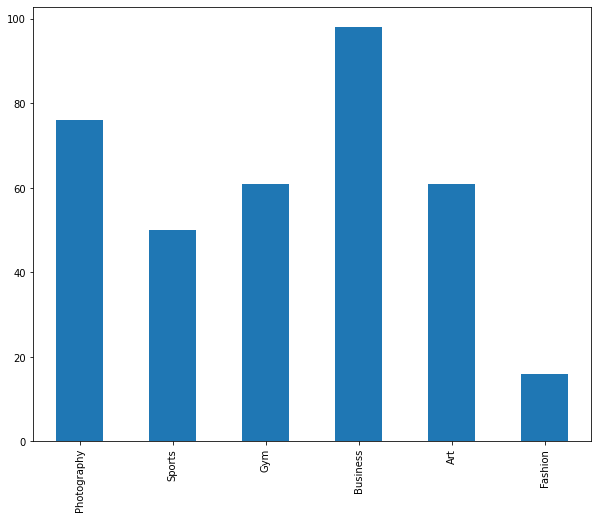

In [ ]:
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 10
fig_size[1] = 8
plt.rcParams["figure.figsize"] = fig_size

labels.sum(axis=0).plot.bar()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [ ]:
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(X_train)

X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)

vocab_size = len(tokenizer.word_index) + 1

maxlen = 200

X_train = pad_sequences(X_train, padding='post', maxlen=maxlen)
X_test = pad_sequences(X_test, padding='post', maxlen=maxlen)

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
from numpy import array
from numpy import asarray
from numpy import zeros

embeddings_dictionary = dict()

glove_file = open('/content/drive/My Drive/Colab Notebooks/glove.6B.100d.txt', encoding="utf8")

for line in glove_file:
    records = line.split()
    word = records[0]
    vector_dimensions = asarray(records[1:], dtype='float32')
    embeddings_dictionary[word] = vector_dimensions
glove_file.close()

embedding_matrix = zeros((vocab_size, 100))
for word, index in tokenizer.word_index.items():
    embedding_vector = embeddings_dictionary.get(word)
    if embedding_vector is not None:
        embedding_matrix[index] = embedding_vector

In [ ]:
sequence_input = Input(shape=(maxlen,), dtype='int32')
embedding_layer = Embedding(vocab_size,
                           100,
                           weights = [embedding_matrix],
                           input_length = maxlen,
                           trainable=False,
                           name = 'embeddings')
embedded_sequences = embedding_layer(sequence_input)

NameError: ignored

In [ ]:
x = LSTM(60, return_sequences=True,name='lstm_layer')(embedded_sequences)
x = GlobalMaxPooling1D()(x)
x = Dropout(0.1)(x)
x = Dense(50, activation="relu")(x)
x = Dropout(0.1)(x)
preds = Dense(6, activation="sigmoid")(x)


In [ ]:
model = Model(sequence_input, preds)
model.compile(loss = 'binary_crossentropy',
             optimizer='adam',
             metrics = ['accuracy'])
model.summary()

Model: "functional_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_7 (InputLayer)         [(None, 200)]             0         
_________________________________________________________________
embeddings (Embedding)       (None, 200, 100)          166700    
_________________________________________________________________
lstm_layer (LSTM)            (None, 200, 60)           38640     
_________________________________________________________________
global_max_pooling1d (Global (None, 60)                0         
_________________________________________________________________
dropout (Dropout)            (None, 60)                0         
_________________________________________________________________
dense_4 (Dense)              (None, 50)                3050      
_________________________________________________________________
dropout_1 (Dropout)          (None, 50)               

In [ ]:

history = model.fit(X_train, y_train, epochs = 30, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/30
11/11 [==============================] - 1s 109ms/step - loss: 0.2181 - accuracy: 0.7009 - val_loss: 0.3081 - val_accuracy: 0.4815
Epoch 2/30
11/11 [==============================] - 1s 105ms/step - loss: 0.2094 - accuracy: 0.7196 - val_loss: 0.3077 - val_accuracy: 0.4568
Epoch 3/30
11/11 [==============================] - 1s 101ms/step - loss: 0.2014 - accuracy: 0.7165 - val_loss: 0.3078 - val_accuracy: 0.4691
Epoch 4/30
11/11 [==============================] - 1s 102ms/step - loss: 0.2160 - accuracy: 0.6729 - val_loss: 0.3148 - val_accuracy: 0.4691
Epoch 5/30
11/11 [==============================] - 1s 100ms/step - loss: 0.1928 - accuracy: 0.7290 - val_loss: 0.3214 - val_accuracy: 0.4691
Epoch 6/30
11/11 [==============================] - 1s 105ms/step - loss: 0.1837 - accuracy: 0.7383 - val_loss: 0.3169 - val_accuracy: 0.4938
Epoch 7/30
11/11 [==============================] - 1s 105ms/step - loss: 0.1752 - accuracy: 0.7539 - val_loss: 0.3218 - val_accuracy: 0.4938
Epoch 

In [ ]:
score = model.evaluate(X_test, y_test, verbose=1)

#print("Test Score:", score[0])
print("Test Accuracy:", score[1])

3/3 [==============================] - 0s 18ms/step - loss: 0.4181 - accuracy: 0.5062
Test Accuracy: 0.5061728358268738


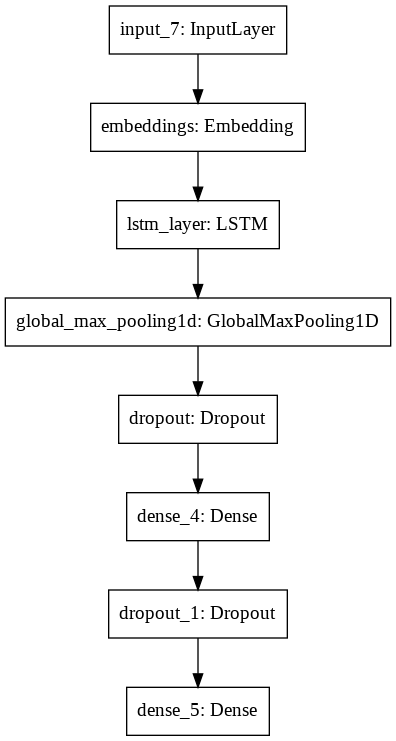

In [ ]:
import tensorflow as tf
tf.keras.utils.plot_model(model)

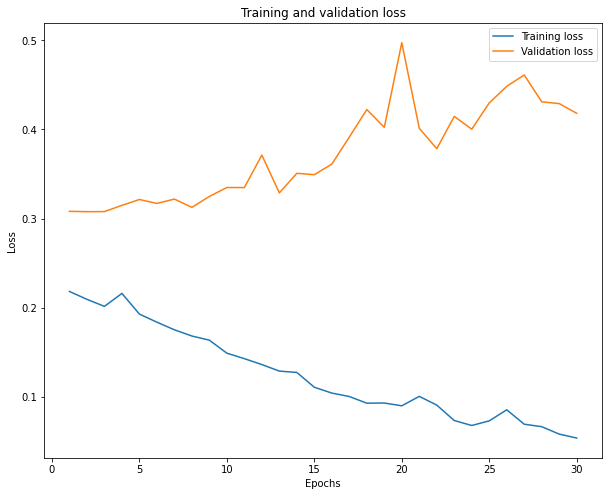

In [ ]:
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss)+1)

plt.plot(epochs, loss, label='Training loss')
plt.plot(epochs, val_loss, label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show();

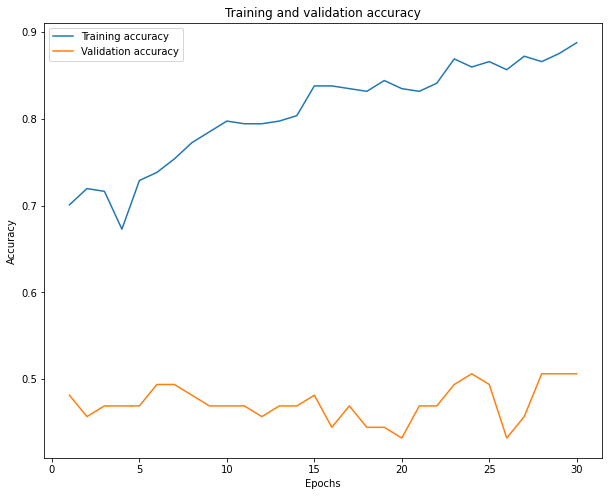

In [ ]:
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

plt.plot(epochs, accuracy, label='Training accuracy')
plt.plot(epochs, val_accuracy, label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend()
plt.show();

In [ ]:
from google.colab import files

uploaded=files.upload()

Saving final_text_un.csv to final_text_un.csv


In [ ]:

import pandas as pd
import io 

  
df = pd.read_csv(io.BytesIO(uploaded['final_text_un.csv'])) 
print(df)

     Unnamed: 0  ... Fashion
0             0  ...       0
1             1  ...       0
2             2  ...       0
3             3  ...       0
4             4  ...       0
..          ...  ...     ...
413         413  ...       0
414         414  ...       0
415         415  ...       0
416         416  ...       0
417         417  ...       0

[418 rows x 8 columns]


In [ ]:
df=df.dropna()

In [ ]:
df["Final_text"]


0                        picture preserves memory moment
1      capture designs bring life location  order custom
2      home quarantine football podcast 200  athletes...
3              revista digital specialized in sports 247
4      volleyball instagram great points skills fails...
                             ...                        
412                                    design perfection
413    future matte painter vfx composer Creteve digi...
414    entusiasta from hq cinema e tv comic book movi...
416    ur Flirtatious girl started new  brand ambassa...
417    design of decorative accessories for the house...
Name: Final_text, Length: 402, dtype: object

In [ ]:
def preprocess_text(sen):
    # Remove punctuations and numbers
    sentence = re.sub('[^a-zA-Z]', ' ', sen)

    # Single character removal
    sentence = re.sub(r"\s+[a-zA-Z]\s+", ' ', sentence)

    # Removing multiple spaces
    sentence = re.sub(r'\s+', ' ', sentence)

    return sentence
X = []
sentences = list(df["Final_text"])
for sen in sentences:
    X.append(preprocess_text(sen))
labels=df[["Photography","Sports","Gym","Business","Art","Fashion"]]
y = labels.values

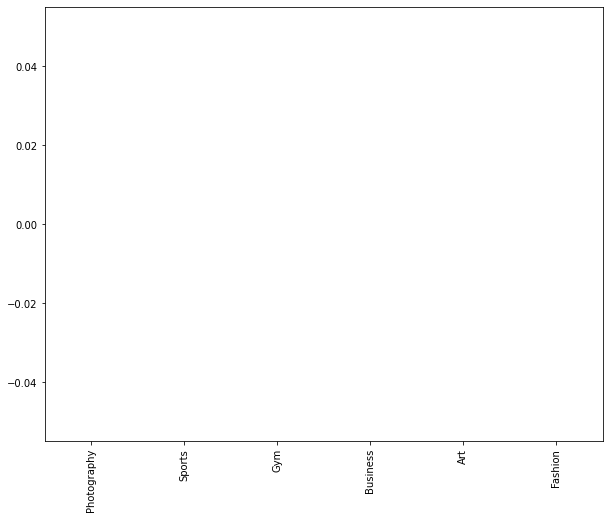

In [ ]:
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 10
fig_size[1] = 8
plt.rcParams["figure.figsize"] = fig_size

labels.sum(axis=0).plot.bar()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [ ]:
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(X_train)

X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)

vocab_size = len(tokenizer.word_index) + 1

maxlen = 200

X_train = pad_sequences(X_train, padding='post', maxlen=maxlen)
X_test = pad_sequences(X_test, padding='post', maxlen=maxlen)

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
from numpy import array
from numpy import asarray
from numpy import zeros

embeddings_dictionary = dict()

glove_file = open('/content/drive/My Drive/Colab Notebooks/glove.6B.100d.txt', encoding="utf8")

for line in glove_file:
    records = line.split()
    word = records[0]
    vector_dimensions = asarray(records[1:], dtype='float32')
    embeddings_dictionary[word] = vector_dimensions
glove_file.close()

embedding_matrix = zeros((vocab_size, 100))
for word, index in tokenizer.word_index.items():
    embedding_vector = embeddings_dictionary.get(word)
    if embedding_vector is not None:
        embedding_matrix[index] = embedding_vector

In [ ]:
sequence_input = Input(shape=(maxlen,), dtype='int32')
embedding_layer = Embedding(vocab_size,
                           100,
                           weights = [embedding_matrix],
                           input_length = maxlen,
                           trainable=False,
                           name = 'embeddings')
embedded_sequences = embedding_layer(sequence_input)

In [ ]:
x = LSTM(60, return_sequences=True,name='lstm_layer')(embedded_sequences)
x = GlobalMaxPooling1D()(x)
x = Dropout(0.1)(x)
x = Dense(50, activation="relu")(x)
x = Dropout(0.1)(x)
preds = Dense(6, activation="sigmoid")(x)


In [ ]:
model = Model(sequence_input, preds)
model.compile(loss = 'binary_crossentropy',
             optimizer='adam',
             metrics = ['accuracy'])
model.summary()

Model: "functional_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 200)]             0         
_________________________________________________________________
embeddings (Embedding)       (None, 200, 100)          166700    
_________________________________________________________________
lstm_layer (LSTM)            (None, 200, 60)           38640     
_________________________________________________________________
global_max_pooling1d_1 (Glob (None, 60)                0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 60)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 50)                3050      
_________________________________________________________________
dropout_3 (Dropout)          (None, 50)               

In [ ]:

history = model.fit(X_train, y_train, epochs =2, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/2
11/11 [==============================] - 1s 123ms/step - loss: 0.6027 - accuracy: 0.0623 - val_loss: 0.4950 - val_accuracy: 0.0000e+00
Epoch 2/2
11/11 [==============================] - 1s 96ms/step - loss: 0.3779 - accuracy: 0.0280 - val_loss: 0.2338 - val_accuracy: 0.0000e+00


In [ ]:
score = model.evaluate(X_test, y_test, verbose=1)

#print("Test Score:", score[0])
print("Test Accuracy:", score[1])

3/3 [==============================] - 0s 18ms/step - loss: 0.2338 - accuracy: 0.0000e+00
Test Accuracy: 0.0


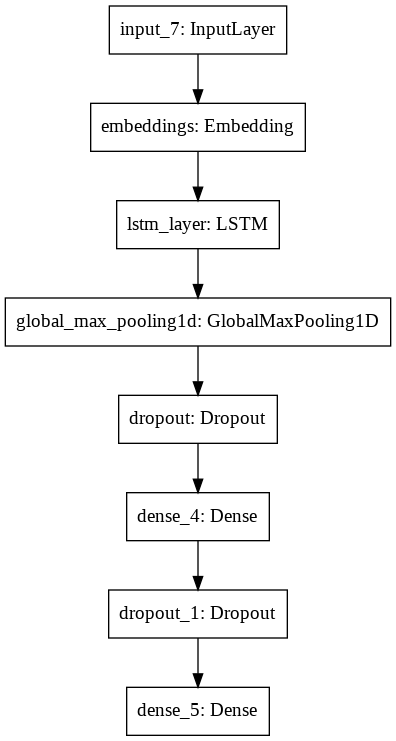

In [ ]:
import tensorflow as tf
tf.keras.utils.plot_model(model)

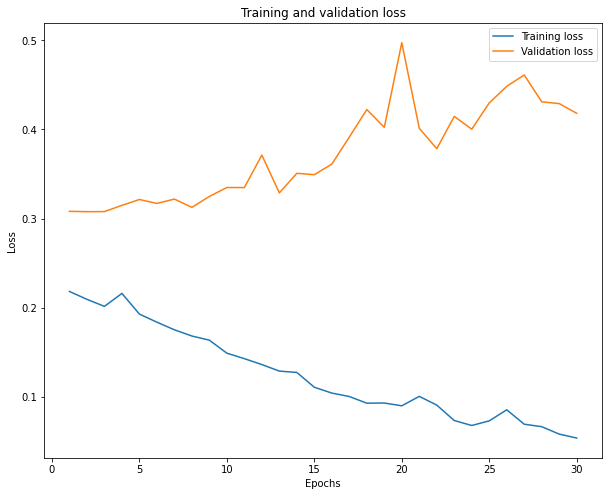

In [ ]:
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss)+1)

plt.plot(epochs, loss, label='Training loss')
plt.plot(epochs, val_loss, label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show();

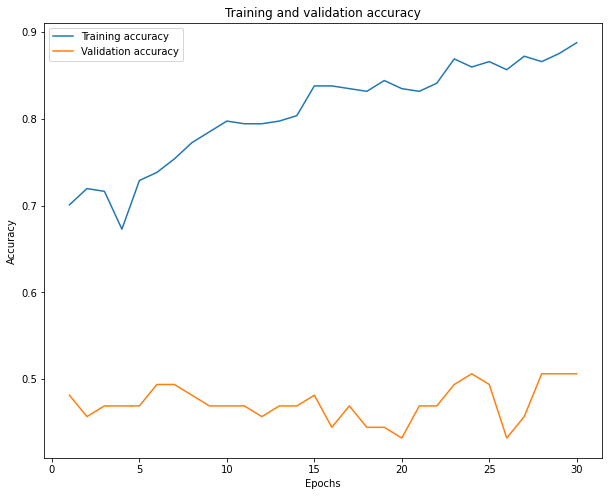

In [ ]:
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

plt.plot(epochs, accuracy, label='Training accuracy')
plt.plot(epochs, val_accuracy, label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend()
plt.show();

In [ ]:
from google.colab import files

uploaded=files.upload()

Saving final_text_un.csv to final_text_un.csv


In [ ]:
X = []
sentences = list(df["Final_text"])
for sen in sentences:
    X.append(preprocess_text(sen))
labels=df[["Photography","Sports","Gym","Business","Art","Fashion"]]
y = labels.values

In [ ]:

import pandas as pd
import io 
  
df2 = pd.read_csv(io.BytesIO(uploaded['final_text_un.csv'])) 
print(df2)

     Unnamed: 0  ... Fashion
0             0  ...       0
1             1  ...       0
2             2  ...       0
3             3  ...       0
4             4  ...       0
..          ...  ...     ...
413         413  ...       0
414         414  ...       0
415         415  ...       0
416         416  ...       0
417         417  ...       0

[418 rows x 8 columns]


In [ ]:
from numpy import array
from numpy import asarray
from numpy import zeros

embeddings_dictionary = dict()

glove_file = open('/content/drive/My Drive/Colab Notebooks/glove.6B.100d.txt', encoding="utf8")

for line in glove_file:
    records = line.split()
    word = records[0]
    vector_dimensions = asarray(records[1:], dtype='float32')
    embeddings_dictionary[word] = vector_dimensions
glove_file.close()

embedding_matrix = zeros((vocab_size, 100))
for word, index in tokenizer.word_index.items():
    embedding_vector = embeddings_dictionary.get(word)
    if embedding_vector is not None:
        embedding_matrix[index] = embedding_vector

NameError: ignored

In [ ]:
sequence_input = Input(shape=(maxlen,), dtype='int32')
embedding_layer = Embedding(vocab_size,
                           100,
                           weights = [embedding_matrix],
                           input_length = maxlen,
                           trainable=False,
                           name = 'embeddings')
embedded_sequences = embedding_layer(sequence_input)